# required imports

In [1]:
%matplotlib notebook

from combine.philip_zb_w7xt_version2 import gen_grid
from matplotlib import pyplot as plt
import ipywidgets as widgets
import numpy as np

from combine.quick_g import widget_g_plot, multi_bump
import combine.grid_analyze_version2 as ga

# simple EIM half module grid

## simple radial projection at phi=10° and tracing into other slices

In [2]:
# grid parameters, you can add more!
constants = {"NirS": 5, "NirC": 5, "NirN": 10,  # in -> outside cell number 
             "Niphalf": 100, "is_bean": True,  # half pol cell number
             "eq_space": False, "eq_space_vessel": False, "Nit": 37,
             "zoidpol": False, "trace_angle": 10, # angle is int in [0,36]
             "center_delta_R": .15}

In [3]:
g1 = gen_grid(constants, pp=False) # changes constants in place!
# you can also save the generated grids so you do not need to regenerate them
# NirSc = constants['NirS']
# g = gen_grid(constants, save=f"/SOME/PATH/the_grid_with_NirS={NirSc}.npy")
# or print the intermediate steps by setting pp=True

r = 0, r = 1, r = 2, r = 3, r = 4, r = 5, r = 6, r = 7, r = 8, r = 9, File: W7X-VacuumVessel-Medium.kis
Kisslinger mesh with 21 Phi values with 73 R,Z values per phi.
5-fold periodicity
Reference point: 0.000000 [cm] 0.000000 [cm] (R,Z)


<IPython.core.display.Javascript object>


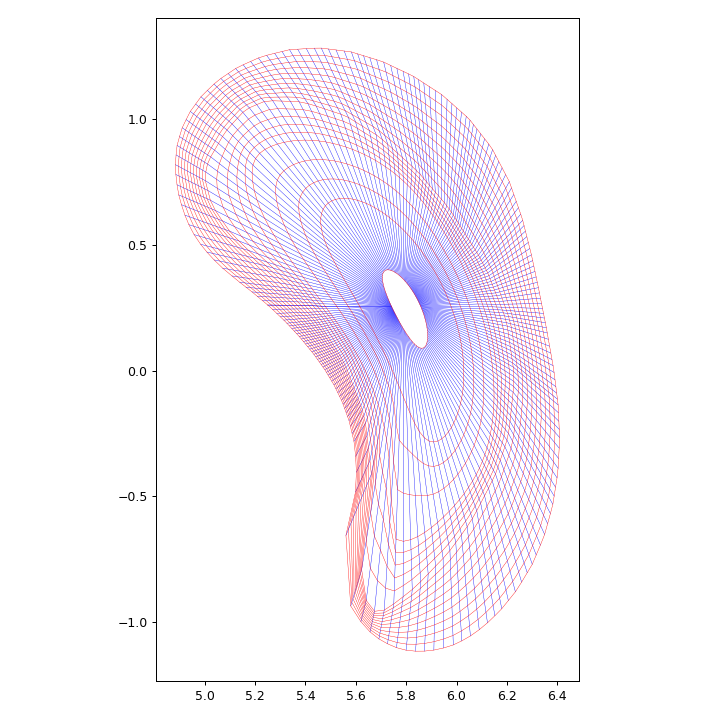

interactive(children=(IntSlider(value=10, description='phi', max=36), Output()), _dom_classes=('widget-interac…

In [4]:
# and then load them again, eg:
# g = np.load("../grids/g_eqi1_eqo0_zp0_ta10.npy")
widget_g_plot(g1, phi=10, widget=True)

In [5]:
# the grid is not convex, which is bad.
# ga.nonconvex returns an integer value for every cell
# 1 if convex, 0 if not convex, -1 if convex but parameterized in mathematically negative direction
# check for nonconvexness by checking if all cells are convex:
convex_cells = ga.nonconvex(g1) == 1
np.all(convex_cells)

False

In [6]:
# you can check the grid indices for the nonconvex cells via this code
ret = np.nonzero(convex_cells != 1)
np.array([*ret]).T
# the tri-tuples are the radial (inside to outside), poloidal (beginning at thick line counterclockwise)
# and toroidal (phi slice number) coordinate.
# so check phi=26, r=3, tht=47 (~1/4*200, so a fourth around)

array([[ 3, 47, 26],
       [ 3, 47, 27],
       [ 3, 47, 28],
       [ 3, 47, 29],
       [ 3, 47, 30],
       [ 3, 47, 31],
       [ 3, 47, 32],
       [ 3, 47, 33],
       [ 3, 47, 34],
       [ 3, 47, 35],
       [ 3, 47, 36],
       [ 4, 47, 32],
       [ 4, 47, 33],
       [ 4, 47, 34],
       [ 4, 47, 35],
       [ 4, 47, 36],
       [ 6, 44,  0],
       [ 6, 44,  1],
       [ 6, 44, 20],
       [ 6, 44, 21],
       [ 6, 44, 22],
       [ 6, 44, 23],
       [ 6, 44, 24],
       [ 6, 44, 25],
       [ 6, 44, 26],
       [ 6, 44, 27],
       [ 6, 44, 28],
       [ 6, 44, 29],
       [ 6, 44, 30],
       [ 6, 44, 31],
       [ 6, 44, 32],
       [ 6, 44, 33],
       [ 6, 44, 34],
       [ 6, 44, 35],
       [ 6, 44, 36],
       [ 7, 44,  0],
       [ 7, 44,  1],
       [ 7, 44,  2],
       [ 7, 44,  3],
       [ 7, 44,  4],
       [ 7, 44,  5],
       [ 7, 44,  6],
       [ 7, 44, 25],
       [ 7, 44, 26],
       [ 7, 44, 27],
       [ 7, 44, 28],
       [ 7, 44, 29],
       [ 7, 4

## grid smoothing and equal poloidal spacing on inside surfaces

In [7]:
# now lets do the same with zoidpol (grid smoothing) and equal spacing on the inner surfaces

In [8]:
constants = {"NirS": 5, "NirC": 5, "NirN": 10,  # in -> outside cell number 
             "Niphalf": 100, "is_bean": True,  # half pol cell number
             "eq_space": True, "eq_space_vessel": False, "Nit": 37,
             "zoidpol": True, "trace_angle": 10, # angle is int in [0,36]
             "center_delta_R": .15}
g2 = gen_grid(constants)

r = 0, r = 1, r = 2, r = 3, r = 4, r = 5, r = 6, r = 7, r = 8, r = 9, File: W7X-VacuumVessel-Medium.kis
Kisslinger mesh with 21 Phi values with 73 R,Z values per phi.
5-fold periodicity
Reference point: 0.000000 [cm] 0.000000 [cm] (R,Z)


<IPython.core.display.Javascript object>


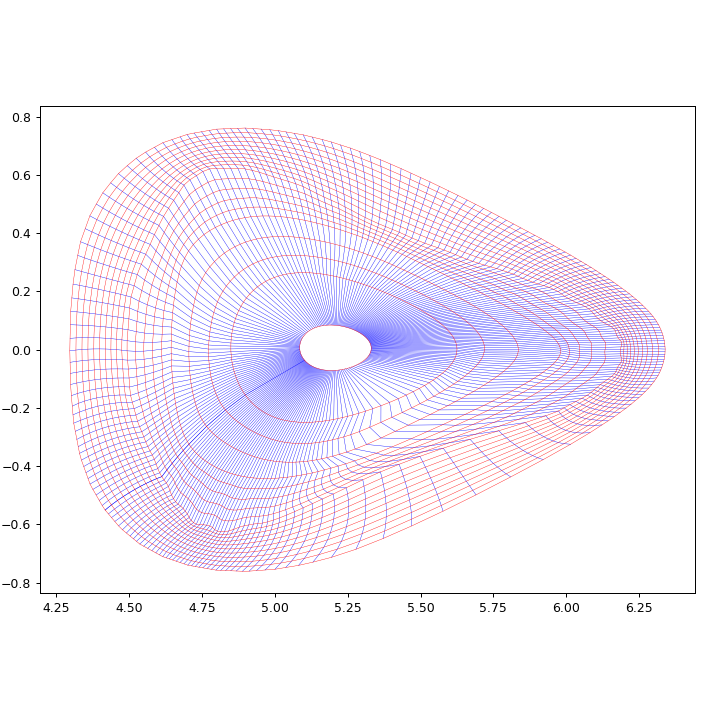

interactive(children=(IntSlider(value=10, description='phi', max=36), Output()), _dom_classes=('widget-interac…

In [9]:
widget_g_plot(g2, phi=10, widget=True)

In [10]:
# this grid is now convex
convex_cells = ga.nonconvex(g2) == 1
ret = np.nonzero(convex_cells != 1)
np.array([*ret]).T

array([], shape=(0, 3), dtype=int64)

## changed vessel distribution

r = 0, r = 1, r = 2, r = 3, r = 4, r = 5, r = 6, r = 7, r = 8, r = 9, File: W7X-VacuumVessel-Medium.kis
Kisslinger mesh with 21 Phi values with 73 R,Z values per phi.
5-fold periodicity
Reference point: 0.000000 [cm] 0.000000 [cm] (R,Z)


<IPython.core.display.Javascript object>


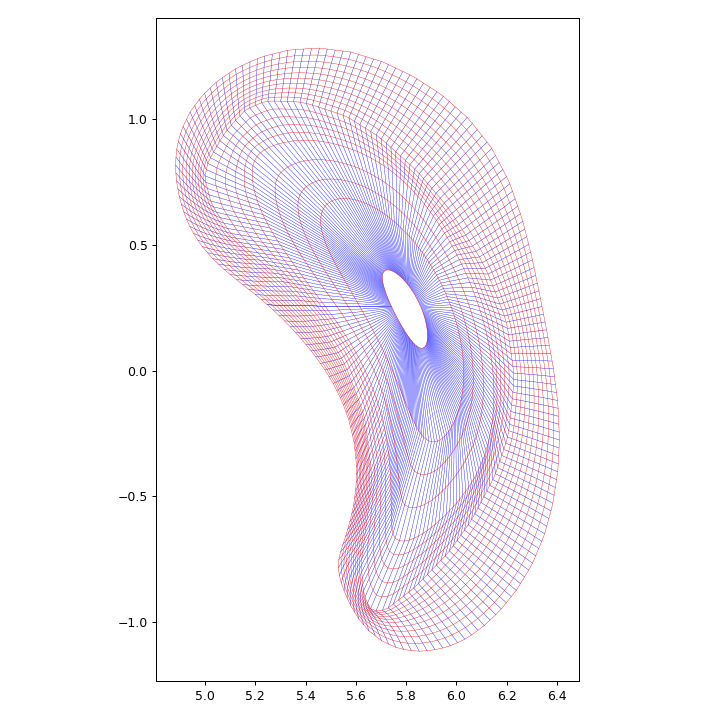

interactive(children=(IntSlider(value=10, description='phi', max=36), Output()), _dom_classes=('widget-interac…

In [11]:
# if we just force the vessel grid to also be equally spaced, then we get a pretty bad grid
constants = {"NirS": 5, "NirC": 5, "NirN": 10,  # in -> outside cell number 
             "Niphalf": 100, # half pol cell number
             "eq_space": True, "eq_space_vessel": True, "Nit": 37,
             "zoidpol": True, "trace_angle": 10, # angle is int in [0,36]
             "center_delta_R": .15}
g3 = gen_grid(constants)
widget_g_plot(g3, phi=10, widget=True)

In [12]:
# so lets shift the outer points around with a density distribution
size = constants["Niphalf"]*2+1, constants["Nit"]
scales_mus_covs = [
    [ 0.4,  [0.1 ,0   ], [[15,0],[0,10]]],
    [-0.45, [0.35,0   ], [[25,0],[0,10]]],
    [-0.25, [0.85,0   ], [[10,0],[0,10]]],
    [ 0.2,  [0.1 ,0.2 ], [[10,0],[0,10]]],
    [-0.15, [0.7 ,0.4 ], [[35,0],[0,10]]], 
    [0.5,   [1   ,0.45], [[5,0],[0,13]]],
    [0.1,   [0.7 ,0   ], [[5,0],[0,5]]],
    [-0.1,  [1   ,0   ], [[10,0],[0,5]]],
    [0.3,   [0.05,0.55], [[20,-15],[-15,30]]],
    [0.3,   [0   ,0.65], [[15,0],[0,5]]],
    [0.2,   [0   ,0.75], [[10,0],[0,15]]],
    [-0.4,  [0.2 ,0.45], [[5,0],[0,10]]],
    [-0.5,  [0.20, 0.65],[[8,0],[0,10]]],
    [-0.4,  [0.20,0.65], [[5,0],[0,5]]],
    [0.2,   [0.34,0.65], [[5,0],[0,5]]],
    [0.2,   [0.30,0.66], [[5,0],[0,5]]],
    [-0.5,  [0.24,0.85], [[5,0],[0,5]]],
    [0.2,   [0.34,0.85], [[5,0],[0,5]]],
    [0.2,   [0.30,0.86], [[5,0],[0,5]]],
    [-0.3,  [0.8,0.65],  [[30,0],[0,10]]],
    [0.1,   [0.7,0.85],  [[20,0],[0,10]]],
    [-0.15, [0.85,0.85], [[20,0],[0,10]]],    
    [0.1,   [0.35,0.95], [[20,0],[0,10]]],
    [-0.1,  [0.85,0.95], [[20,0],[0,10]]],   
    [0.6,   [0   ,1   ], [[20,0],[0,10]]],    
    [-0.6,  [0.25,1   ], [[20,0],[0,10]]],
    [0.4,   [0.4 ,1   ], [[10,0],[0,10]]],
    [0.6,   [0.45,1   ], [[10,0],[0,10]]],
]

# take a look into dnsity_trials and Bump_trials on how to create the density functions.
# tl;dr: each scales_mus_covs adds a scaled 2d gaussion distribution with the given 2 means and 2x2 covariance matrix
#        after that the density function is normalized in the poloidal direction and mapped onto the poloidal vessel
constants["vessel_pdf"] = multi_bump(size, scales_mus_covs)

r = 0, r = 1, r = 2, r = 3, r = 4, r = 5, r = 6, r = 7, r = 8, r = 9, File: W7X-VacuumVessel-Medium.kis
Kisslinger mesh with 21 Phi values with 73 R,Z values per phi.
5-fold periodicity
Reference point: 0.000000 [cm] 0.000000 [cm] (R,Z)


<IPython.core.display.Javascript object>


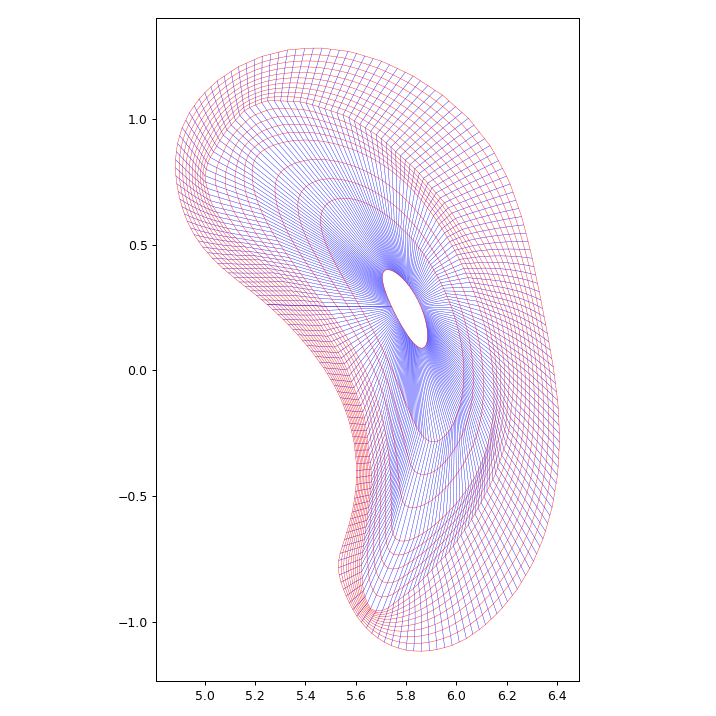

interactive(children=(IntSlider(value=10, description='phi', max=36), Output()), _dom_classes=('widget-interac…

In [13]:
g4 = gen_grid(constants)  # vessel_pdf is added in constants
widget_g_plot(g4, phi=10) # grid looks better

## side by side look

In [14]:
def widget_g_plot_experimental(g, g2, phi=0, title=None, widget=False, sharex=True, sharey=True):
    fig, (ax, ax2) = plt.subplots(figsize=(9.5,8), ncols=2, sharex=True, sharey=True)
    ax.set_aspect("equal"); ax2.set_aspect("equal")
    
    def g_plot(phi):
        ax.clear()
        # ax.set_title("Equal Spacing")
        ax.set_title("Grid 1")
        R, z, _ = np.transpose(g[:,:,phi,:], (2,0,1))
        ax.plot(R[:,::20], z[:,::20], c="blue", lw=.7, zorder=100)
        # ax.plot(R.T[:,::10], z.T[:,::10], c="red", lw=.7, zorder=100)
        ax.plot(R,z, c="blue", lw=0.3, zorder=101)
        ax.plot(R.T,z.T, c="red", lw=0.3, zorder=101)
        ax.plot(R.T[0], z.T[0], c="darkblue", lw=1, zorder=102)
        ax2.clear()
        # ax2.set_title("Rescaled Spacing")
        ax2.set_title("Grid 2")
        R, z, _ = np.transpose(g2[:,:,phi,:], (2,0,1))
        ax2.plot(R[:,::20], z[:,::20], c="blue", lw=.7, zorder=100)
        # ax2.plot(R.T[:,::10], z.T[:,::10], c="red", lw=.7, zorder=100)
        ax2.plot(R,z, c="blue", lw=0.3, zorder=101)
        ax2.plot(R.T,z.T, c="red", lw=0.3, zorder=101)
        ax2.plot(R.T[0], z.T[0], c="darkblue", lw=1, zorder=102)
        fig.tight_layout()
    
    phi = widgets.IntSlider(min=0, max=g.shape[2]-1, value=phi, step=1)
    widgets.interact(g_plot, phi = phi)

<IPython.core.display.Javascript object>


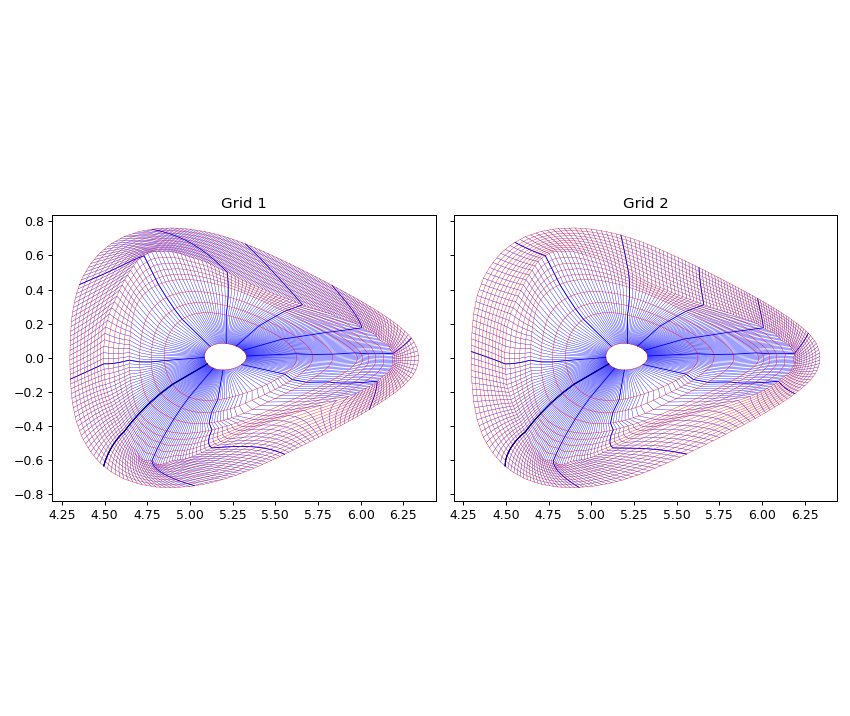

interactive(children=(IntSlider(value=10, description='phi', max=36), Output()), _dom_classes=('widget-interac…

In [15]:
widget_g_plot_experimental(g3, g4, phi=10)
# the thick blue line every tenth poloidal angle is to better read the indices of specific cells 

# Full Torus (ErrorField) EIM grid

In [40]:
# lets now change to a full 360° field.
# we need to tell the function that we are looking at a full_torus
# as well as providing a correct 360° magnetic field
consts = {
    # in -> outside cell numbers (sum is redial resolution)
    "NirC": 3, "NirS": 2, "NirN": 2,
    # half(-1/2) poloidal and toroidal cell number (per half-module)
    "Niphalf": 30, "Nit": 37, "full_torus": True,
    # poloidal grid spacing and smoothing options implemented by phg
    "eq_space": True, "eq_space_vessel": False, "zoidpol": False,
    # strating angle in [0,Nit[ and offset list of projection center
    "trace_angle": 10, "center_delta_R": .15, # [0,0,0,0.2,.15],
    # path to magnetic field file
    "magnetic_field_file": "./Fields/Field-EIM-ErrFullT-std.dat", # ErrFullT-
    # Big radius values for field surfaces (default EIM) and axis + accuracy
    # multiple values lead to multiple points beeing traced for one surface
    # this makes sense when they are chaotic
    # EIM: [5.9014041, 6.1014041, 6.2014041, 6.2864041], 5.944e+00, 72
    # FTM: [5.99, 6.09, 6.1751, np.linspace(6.2129, 6.2129001, 10)], 5.96957, 720
    # EIMError: [5.8807, 6.095, 6.175, 6.246], 5.9315, 720
    "surface_radii": [5.8807, 6.095, 6.175, 6.246],
    "Rcax": 5.9315, "tr_acc": 720,
    # parameters for outer surface fit: alpha value for alpha shape,
    # buffer size for erosion antierosion, maximum deviation of simplified
    # shape, the numper of nearest neighbour smoothings and if it gets plotted
    #"shrink_fit_outer_surface": (60, 0.04, 0.002, 10, True)
}

In [41]:
# smaller grid so that it doesnt take as long to generate
g5 = gen_grid(consts)

r = 0, r = 1, r = 2, r = 3, r = 4, File: W7X-VacuumVessel-Medium.kis
Kisslinger mesh with 21 Phi values with 73 R,Z values per phi.
5-fold periodicity
Reference point: 0.000000 [cm] 0.000000 [cm] (R,Z)


<IPython.core.display.Javascript object>


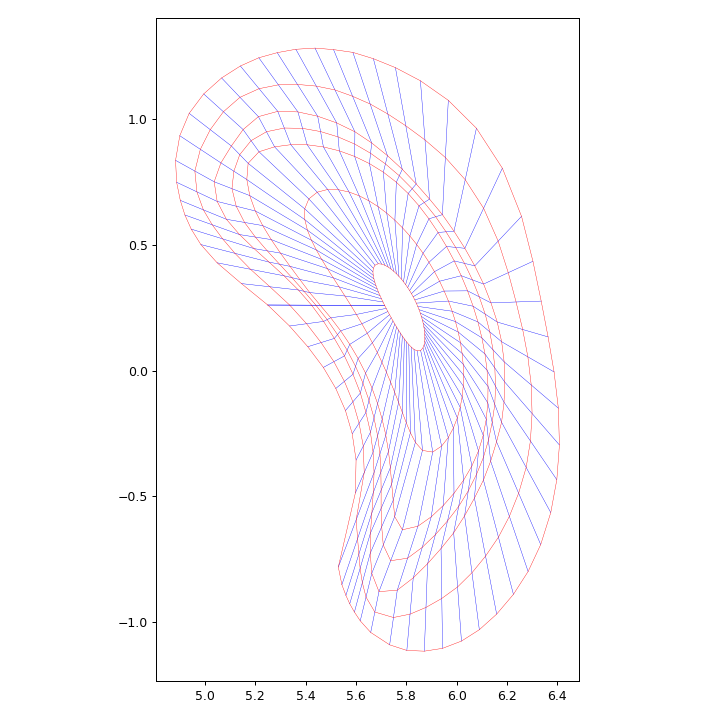

interactive(children=(IntSlider(value=10, description='phi', max=360), Output()), _dom_classes=('widget-intera…

In [43]:
# one can see that due to iota != 1 and iota not beeing constant over r, one gets quite strong twisting.
widget_g_plot(g5, phi=10)

# FTM half module grid

In [ ]:
# The ftm field surfaces have some chaotic Domains which would lead to a chaotic 
# island encompassing field surface not suitable for grid generation. So we shrinkwrap
# the field line surface (blue) before eroding away the peaks (orange) and smoothing the resulting shape (green)

<IPython.core.display.Javascript object>


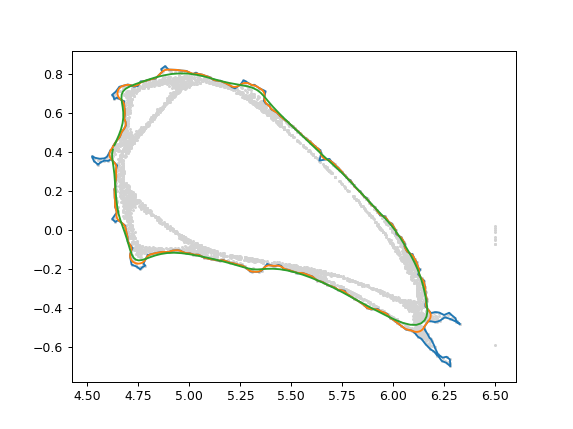

r = 0, r = 1, r = 2, r = 3, r = 4, File: W7X-VacuumVessel-Medium.kis
Kisslinger mesh with 21 Phi values with 73 R,Z values per phi.
5-fold periodicity
Reference point: 0.000000 [cm] 0.000000 [cm] (R,Z)


In [50]:
consts = {
        # in -> outside cell numbers (sum is redial resolution)
        "NirC": 3, "NirS": 2, "NirN": 2,
        # half(-1/2) poloidal and toroidal cell number
        "Niphalf": 50, "Nit": 37,
        # poloidal grid spacing and smoothing options implemented by phg
        "eq_space": True, "eq_space_vessel": False, "zoidpol": False,
        # strating angle in [0,Nit[ and offset list of projection center
        "trace_angle": 26, "center_delta_R": [0,0,0,0.15,.15],
        # path to magnetic field file
        "magnetic_field_file": "./Fields/Field-FTM-high.dat",
        # Big radius values for field surfaces (default EIM) and axis + accuracy
        # multiple values lead to multiple points beeing traced for one surface
        # this makes sense when they are chaotic
        # EIM: [5.9014041, 6.1014041, 6.2014041, 6.2864041], 5.944e+00, 72
        # FTM: [5.99, 6.09, 6.1751, np.linspace(6.2129, 6.2129001, 10)], 5.96957, 720
        "surface_radii": [5.99, 6.09, 6.1751, np.linspace(6.2129, 6.2129001, 10)],
        "Rcax": 5.96957, "tr_acc": 720,
        # parameters for outer surface fit: alpha value for alpha shape,
        # buffer size for erosion antierosion, maximum deviation of simplified
        # shape, the numper of nearest neighbour smoothings and if it gets plotted
        "shrink_fit_outer_surface": (40, 0.04, 0.002, 10, True) # <- make False to not plot the shape
    }
g6 = gen_grid(consts)

<IPython.core.display.Javascript object>


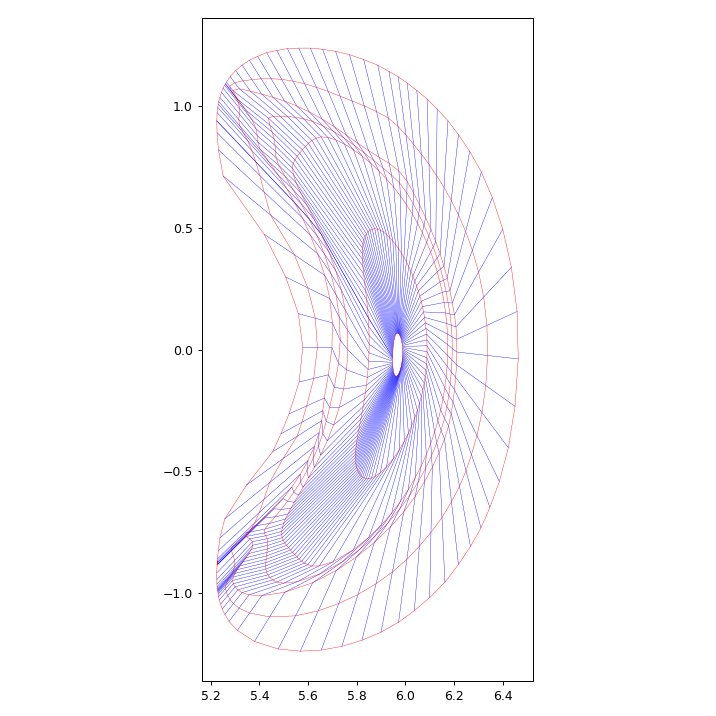

interactive(children=(IntSlider(value=0, description='phi', max=36), Output()), _dom_classes=('widget-interact…

In [51]:
widget_g_plot(g6)

# Remarks